### Computer Vision Task: 4

#### 2.Choose any two image feature extraction techniques and implement it using Python and a library like OpenCV. You can use a sample image or dataset available online. 
#### a.Explain the steps involved in the implementation. (5 points)
#### b.Include the code with comments to clarify each step. (5 points)

#### c.Reflect on potential real-world applications of the chosen technique. (5 points)

## Task 4: Image Feature Extraction

We will implement two feature extraction techniques using OpenCV:

### Technique 1: SIFT (Scale-Invariant Feature Transform)
1. Detect keypoints in the image using Difference of Gaussians.
2. Compute descriptors that are invariant to scale and rotation.
3. Each descriptor encodes local gradient information around a keypoint.
4. Result: A set of keypoints + descriptors useful for matching and recognition.

### Technique 2: Canny Edge Detection
1. Convert the image to grayscale.
2. Apply Gaussian blur to reduce noise.
3. Compute gradients to detect edges.
4. Apply non-maximum suppression and hysteresis thresholding.
5. Result: A binary edge map highlighting structural features.

These techniques highlight different aspects:
- **SIFT**: Local feature descriptors for matching and recognition.
- **Canny**: Global edge-based structural features.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image loaded successfully. Shape: (3604, 2598, 3)


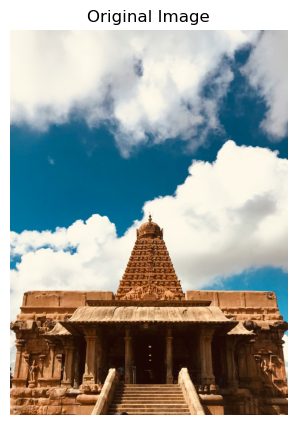

In [15]:
def show(img, title="", cmap=None, size=(5, 5)):
    plt.figure(figsize=size)
    if cmap is None and len(img.shape)==3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap if cmap else "gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

#Load img
img = cv2.imread("/Users/santhoshkumarg/Downloads/Python_Training/Periya_Kovil.jpg")

# Check if image loaded
if img is None:
    print("Image failed to load. Please check the path.")
else:
    print(f"Image loaded successfully. Shape: {img.shape}")
    show(img, title="Original Image")

### SIFT feature Extraction

Number of keypoints detected: 28167
Descriptor shape: (28167, 128)


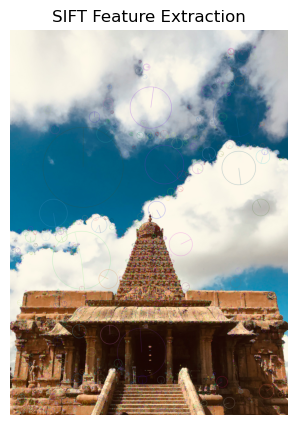

In [18]:
#Convert to grayscale for SIFT
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector (requires opencv-contrib-python)
sift = cv2.SIFT_create()

#Detect keypoints and descriptions
keypoints, descriptors = sift.detectAndCompute(gray, None)

print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

#Draw keypoints on img
sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#results
show(sift_img, title="SIFT Feature Extraction")

### Canny Edge Detection

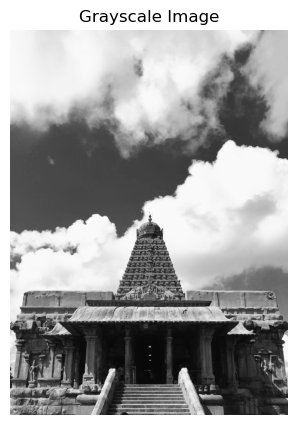

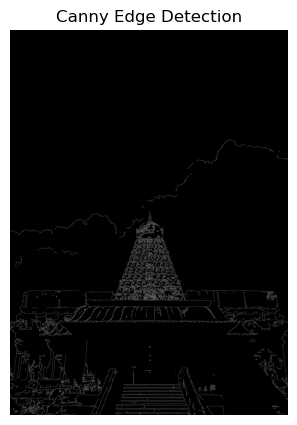

In [21]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5,5), 1.4)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

#results
show(gray, title="Grayscale Image", cmap='gray')
show(edges, title="Canny Edge Detection", cmap='gray')

## Reflection on Real-World Applications

### 1. SIFT (Scale-Invariant Feature Transform)
- **Object Recognition**: Used in computer vision systems to identify objects across different scales, rotations, and viewpoints.
- **Image Matching**: Helps in matching features between two images, useful in panorama stitching and 3D reconstruction.
- **Robotics & Navigation**: Enables robots and drones to recognize landmarks and navigate environments.
- **Medical Imaging**: Assists in detecting and matching patterns in medical scans for diagnosis.

### 2. Canny Edge Detection
- **Industrial Inspection**: Detects edges of manufactured parts to check for defects or irregularities.
- **Document Analysis**: Extracts structural features like text boundaries, diagrams, or signatures.
- **Traffic & Surveillance**: Identifies lane markings, road boundaries, or objects in video feeds.
- **Art & Design**: Used in stylization, sketch generation, and preprocessing for creative applications.

---

### **Conclusion**
- **SIFT** provides robust local descriptors for recognition and matching tasks.  
- **Canny** highlights global structural features, making it ideal for shape analysis and boundary detection.  
Together, they demonstrate how feature extraction can serve both **recognition** (SIFT) and **structural analysis** (Canny) in real-world scenarios.
